# Introduction

In this notebook I will do some exploratory data analysis for the appartment rental dataset of germany. I will focus on the NRW region, especially Düsseldorf for this analysis. The dataset I will be using is the cleaned dataset form kaggle "[Apartment rental offers in Germany](https://www.kaggle.com/corrieaar/apartment-rental-offers-in-germany)"

In [31]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Import the dataset

In [32]:
df = pd.read_csv('immo_data_clean.csv')

In [33]:
df.shape

(265617, 31)

In [34]:
# which variables do I have?
df.columns

Index(['Unnamed: 0', 'regio1', 'serviceCharge', 'heatingType', 'newlyConst',
       'balcony', 'totalRent', 'yearConstructed', 'noParkSpaces', 'hasKitchen',
       'cellar', 'baseRent', 'livingSpace', 'condition', 'interiorQual',
       'petsAllowed', 'lift', 'typeOfFlat', 'geo_plz', 'noRooms', 'floor',
       'numberOfFloors', 'garden', 'regio2', 'regio3', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'date', 'total_rent_new',
       'rent_incl_hc'],
      dtype='object')

In [35]:
# I will leave the rent_incl_hc as the only response variable, I will drop all others
df.drop(columns=['totalRent',
                 'baseRent',
                 'serviceCharge',
                 'total_rent_new',
                 'heatingCosts'], inplace=True)

In [36]:
# I will also rename the response variable to rent
df.rename(columns={'rent_incl_hc': 'rent'}, inplace=True)

## Univariate Exploration

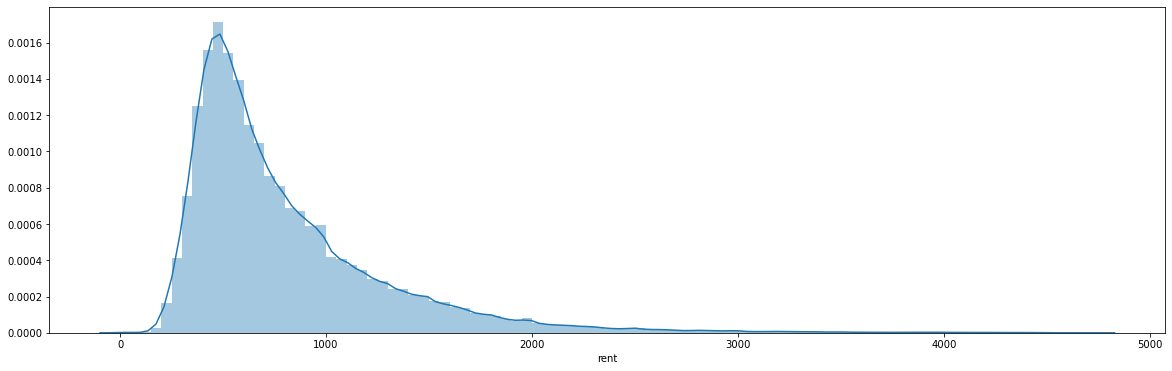

In [49]:
# distribution of the response variable
base_color = sns.color_palette()[0]

bin_edges = np.arange(0, df['rent'].max()+50, 50)

plt.figure(figsize=[20,6])
sns.distplot(df['rent'], bins=bin_edges);

The size of the flat is such an important indicator for price, that before I interpolate this numbers, I would first drop the few rows in which living space is zero

In [38]:
# remove all rows where living space is 0
df = df[df['livingSpace'] != 0]

In [39]:
# create a new variable for the rent/livingSpace (rent/m2)
df['rent_m2'] = df['rent'] / df['livingSpace']
df['rent_m2'].max()

1280.0

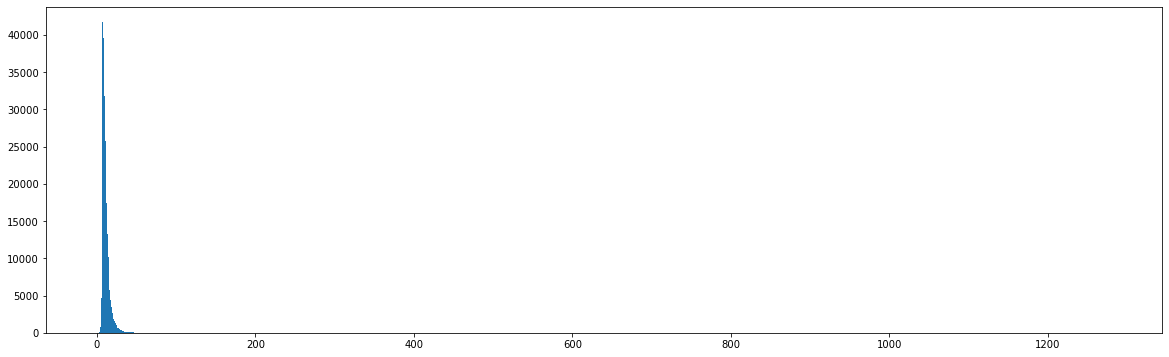

In [42]:
# distribution of the price per squared meter
bin_edges = np.arange(0, df['rent_m2'].max()+1, 1)

plt.figure(figsize=[20,6])
plt.hist(data=df, x='rent_m2', bins=bin_edges);

The price per squared meter is clearly biased. Let us check by which percentile this is the case

In [45]:
for i in np.arange(98, 100, 0.1):
    print('{}: {}'.format(i, np.percentile(df.rent_m2, i)))

98.0: 25.688770825620132
98.1: 26.045931014656944
98.19999999999999: 26.470588235294116
98.29999999999998: 26.867412448837865
98.39999999999998: 27.267772366620896
98.49999999999997: 27.714285714285715
98.59999999999997: 28.174890342926737
98.69999999999996: 28.6339204545445
98.79999999999995: 29.230769230769226
98.89999999999995: 29.857034943473636
98.99999999999994: 30.483870967741936
99.09999999999994: 31.25
99.19999999999993: 32.0
99.29999999999993: 33.0
99.39999999999992: 34.142857142857146
99.49999999999991: 35.67206348394963
99.59999999999991: 37.5
99.6999999999999: 40.0
99.7999999999999: 43.75
99.89999999999989: 51.1764705882353


I am going to keep the 99.8% of the data and get rid of the outlier. For this I will use the same formula as in the data cleaning process

In [46]:
def get_rid_outl(df, list_num_var, percentile):
    """
    INPUT: 
    df: Dataframe
    list_num_var: List of the variables (columns) with outliers that need to be deleted
    percentile: float between 0 and 100: Percentage of the data that will be kept 
    
    OUTPUT:
    DataFrame with the defined amount of data. This means a DataFrame without outliers
    """
    
    perc_dict = {}
    for col in list_num_var: # first, calculate all the percentiles before removing any
        # row, otherwise you will remove more rows than necessary
        value_perc = np.nanpercentile(df[col], percentile)
        value_perc_dict = {col: value_perc}
        perc_dict.update(value_perc_dict)
        
    for var in list_num_var:    
        df = df.loc[(df[var] <= perc_dict[var]) ^ (df[var].isnull())] # include nan values
    
    return df

In [47]:
df = get_rid_outl(df, ['rent_m2'], 99.8)

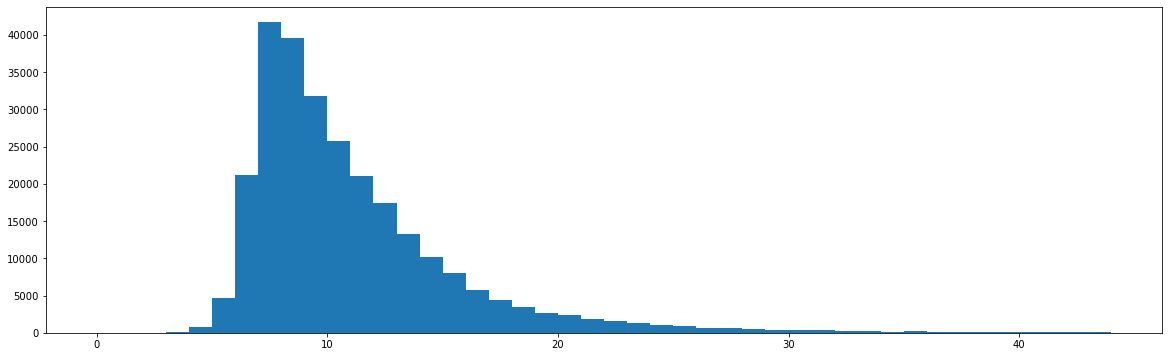

In [48]:
# look at the distribution of the price per squared meter again
bin_edges = np.arange(0, df['rent_m2'].max()+1, 1)

plt.figure(figsize=[20,6])
plt.hist(data=df, x='rent_m2', bins=bin_edges);

In [50]:
df.columns

Index(['Unnamed: 0', 'regio1', 'heatingType', 'newlyConst', 'balcony',
       'yearConstructed', 'noParkSpaces', 'hasKitchen', 'cellar',
       'livingSpace', 'condition', 'interiorQual', 'petsAllowed', 'lift',
       'typeOfFlat', 'geo_plz', 'noRooms', 'floor', 'numberOfFloors', 'garden',
       'regio2', 'regio3', 'energyEfficiencyClass', 'lastRefurbish', 'date',
       'rent', 'rent_m2'],
      dtype='object')

This is much better and as expected pretty similar to the rent price.

Further variables of interest: 
* Region
* Heating type
* Balcony
* Kitchen
* Cellar
* Condition
* Quality of the interior
* Lift
* Type of Flat
* Garden
* Efficiency Class (Energy)

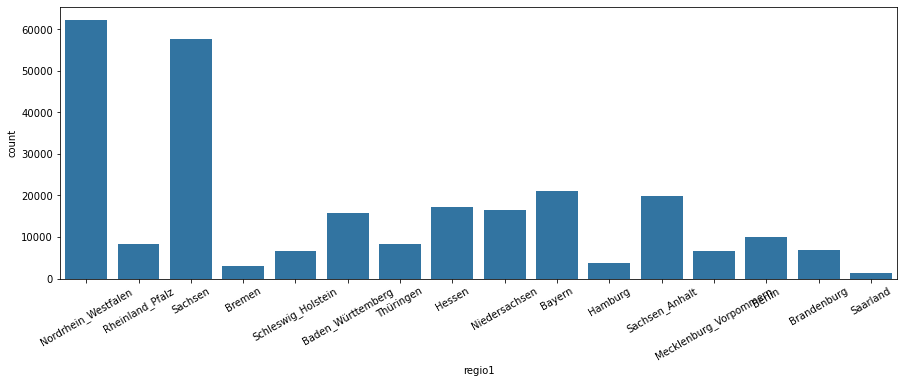

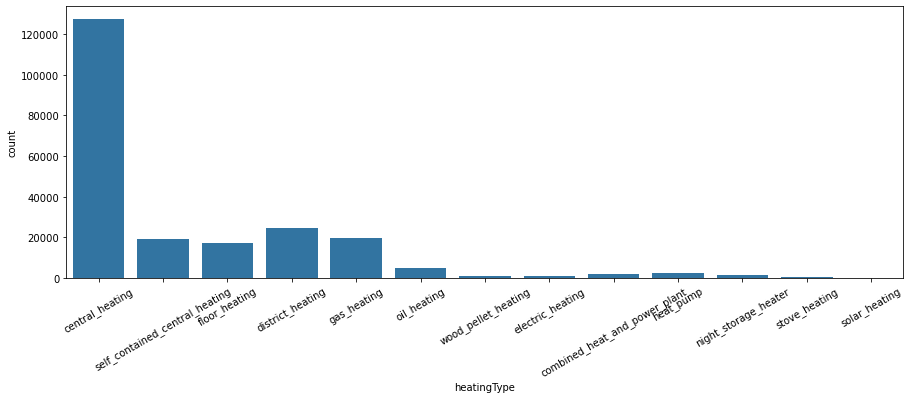

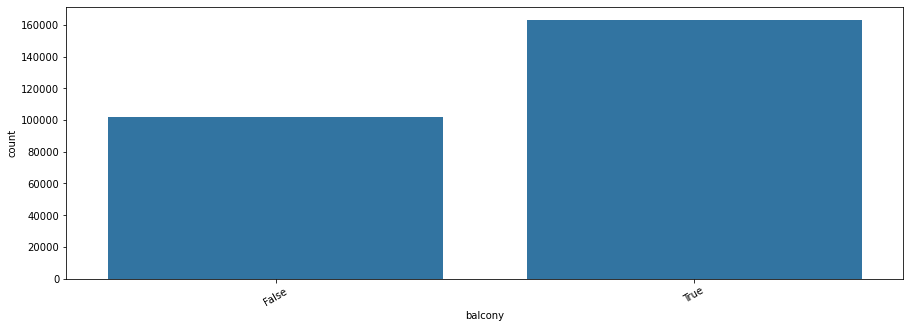

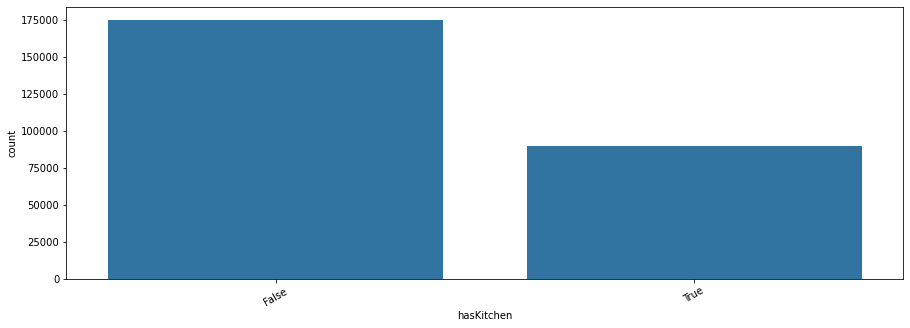

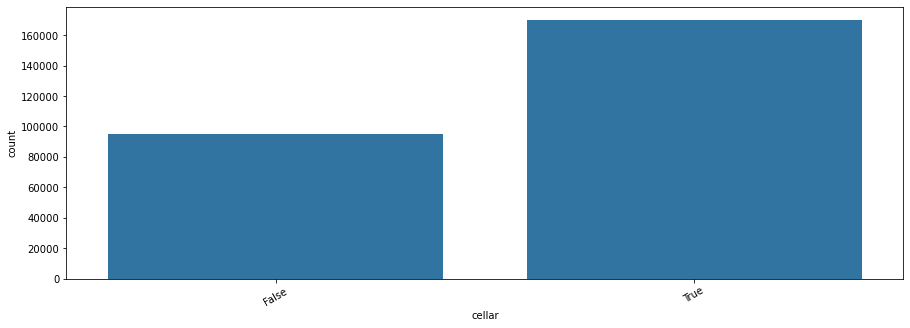

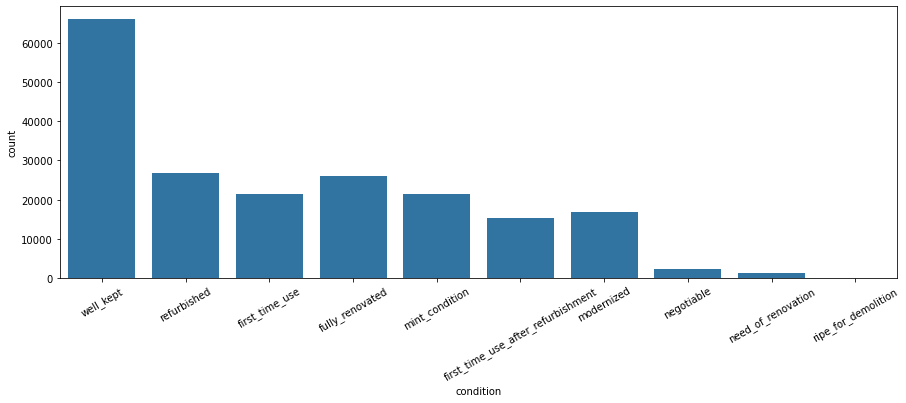

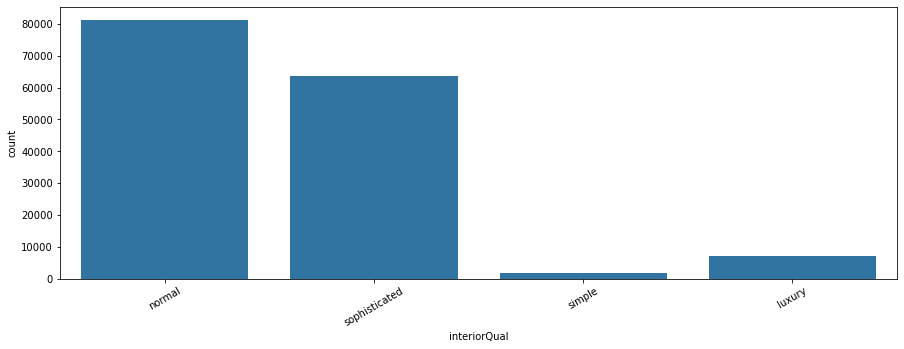

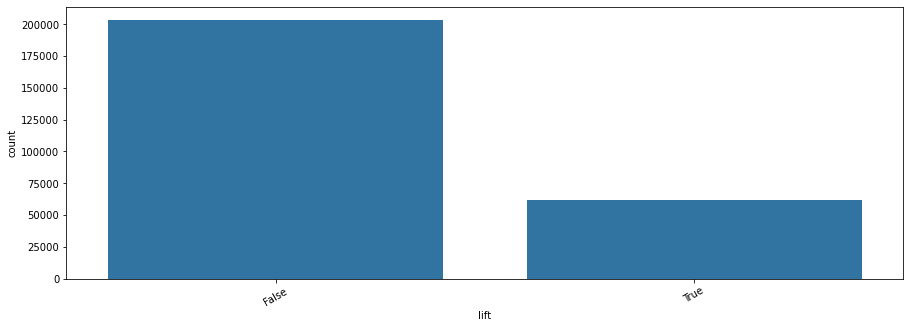

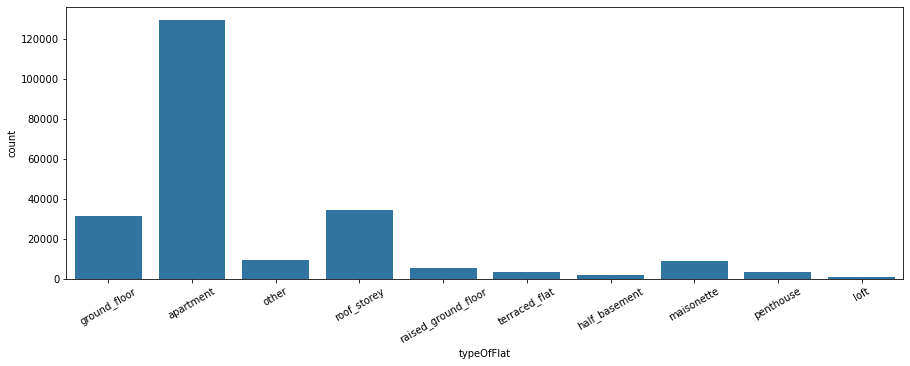

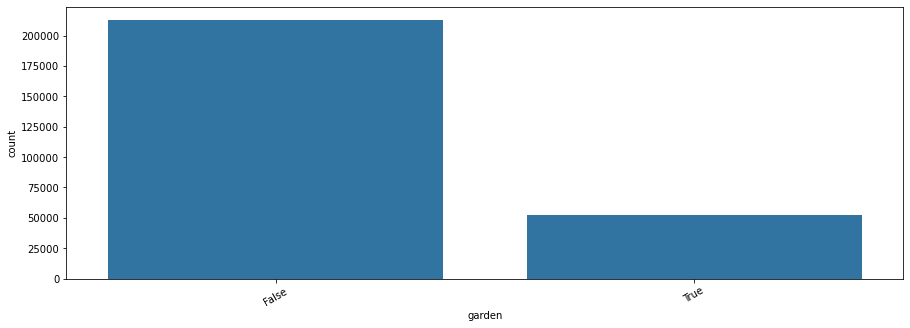

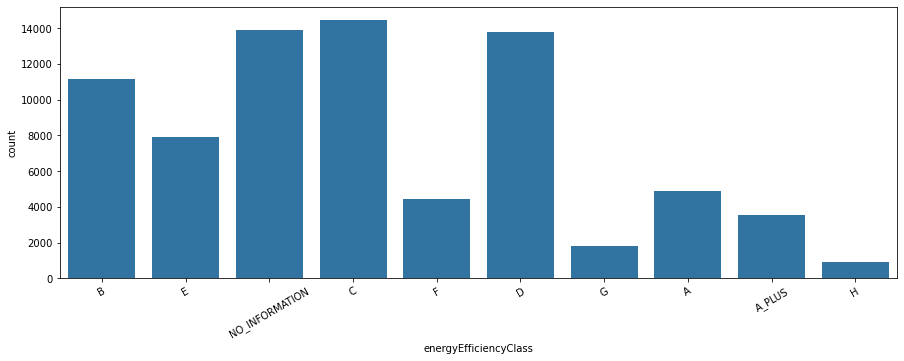

In [52]:
# Create a loop to generate all the graphs

vars_of_interest = ['regio1', 'heatingType', 'balcony', 
                    'hasKitchen', 'cellar', 
                    'condition', 'interiorQual', 'lift', 'typeOfFlat', 
                    'garden', 'energyEfficiencyClass']

for var in vars_of_interest:
    plt.figure(figsize=[15,5])
    sns.countplot(data = df, x=var, color=base_color)
    plt.xticks(rotation=30)

**Summary Univariate Assessment**
* The distribution of rent and rent/qm is as expected
* The number of offers accross germany is plausible
* There is high variation across all quality variables, which is good to fit the prediction model

## Bivariate Assessment

I am mostly interested in the variation of the response variable when the other variables change

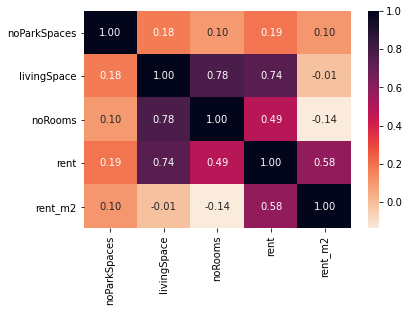

In [53]:
# get the correlation coefficient of the response variable to each other variable

# get a list of all the nummerical variables
list_num_vars = list(df.select_dtypes(include=['float', 'int']).columns)

# generate a heatmpa
sns.heatmap(df[list_num_vars].corr(), cmap='rocket_r', annot=True, fmt='.2f')

the negative correlation values between the rent/qm and other variables is clearly a fall of linear dependency. 

The number of rooms and the living space is clearly correlated - There might be a linear dependency, which has to be taken into account when fitting the linear model

**Now I would like to see the if the relation between the variables looks linear**

<Figure size 1080x1080 with 0 Axes>

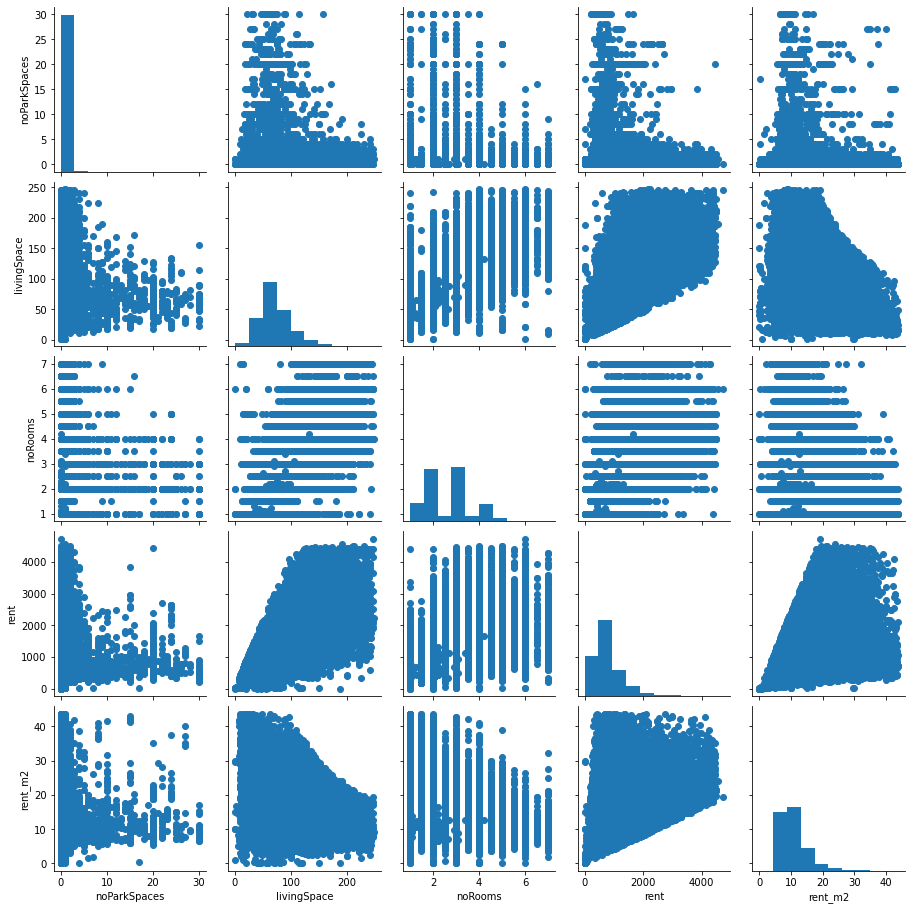

In [57]:
# create a scatter matrix with the numerical variables
plt.figure(figsize=[15,15])
g = sns.PairGrid(data=df, vars=list_num_vars)
g = g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

We can see  that some of the variability comes from the numerical variables but not all of it. Now it is time to check the categorical variables

In [64]:
# change all the ordered categorical variables to a categorical type
# yearConstructed, lastRefurbish, energyEfficiencyClass

# create lists with the right order
yearCon_order = list(df.yearConstructed.value_counts().sort_index().index)
yearRef_order = list(df.yearConstructed.value_counts().sort_index().index)
energy_order = ['A_PLUS', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'NO_INFORMATION']

# create the categorical elements
ordered_yearCon = pd.api.types.CategoricalDtype(ordered=True, categories=yearCon_order)
ordered_yearRef = pd.api.types.CategoricalDtype(ordered=True, categories=yearRef_order)
ordered_energy = pd.api.types.CategoricalDtype(ordered=True, categories=energy_order)

# change the data type to categories
df.yearConstructed = df.yearConstructed.astype(ordered_yearCon)
df.lastRefurbish = df.lastRefurbish.astype(ordered_yearRef)
df.energyEfficiencyClass = df.energyEfficiencyClass.astype(ordered_energy)

In [105]:
# get rid of all years before 1900 as NO_INFORMATION

# create a mask for year constructed and last refurbish
mask = df['yearConstructed'] < '1900'
mask2 = df['lastRefurbish'] < '1900'

df.loc[mask, 'yearConstructed'] = 'NO_INFORMATION'
df.loc[mask2, 'lastRefurbish'] = 'NO_INFORMATION'

In [106]:
# since the year of construction was already change to a category, I need to 
# update the category as well
yearCon_order = list(np.arange(1900, 2021, 1).astype(str))+ ['NO_INFORMATION']
yearRef_order = list(np.arange(1900, 2021, 1).astype(str))+ ['NO_INFORMATION']

# create the categorical elements
ordered_yearCon = pd.api.types.CategoricalDtype(ordered=True, categories=yearCon_order)
ordered_yearRef = pd.api.types.CategoricalDtype(ordered=True, categories=yearRef_order)

# change the data type to categories
df.yearConstructed = df.yearConstructed.astype(ordered_yearCon)
df.lastRefurbish = df.lastRefurbish.astype(ordered_yearRef)

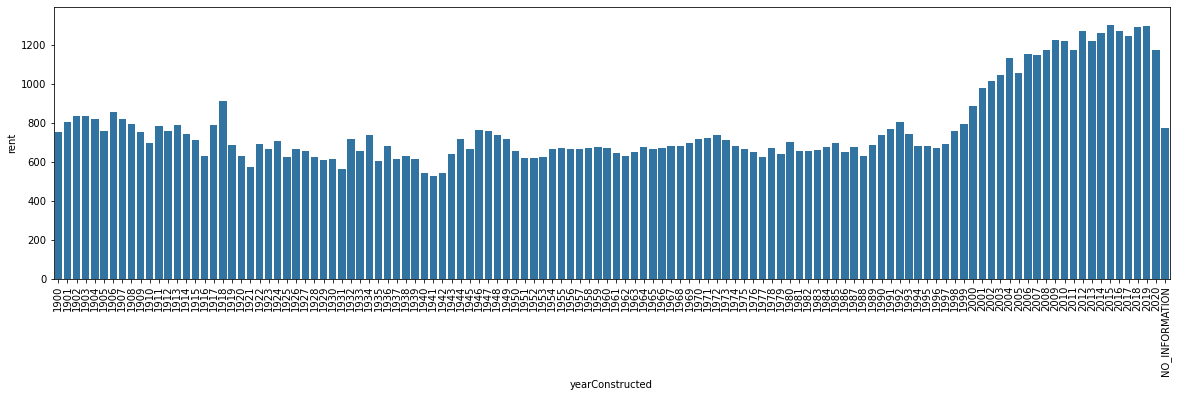

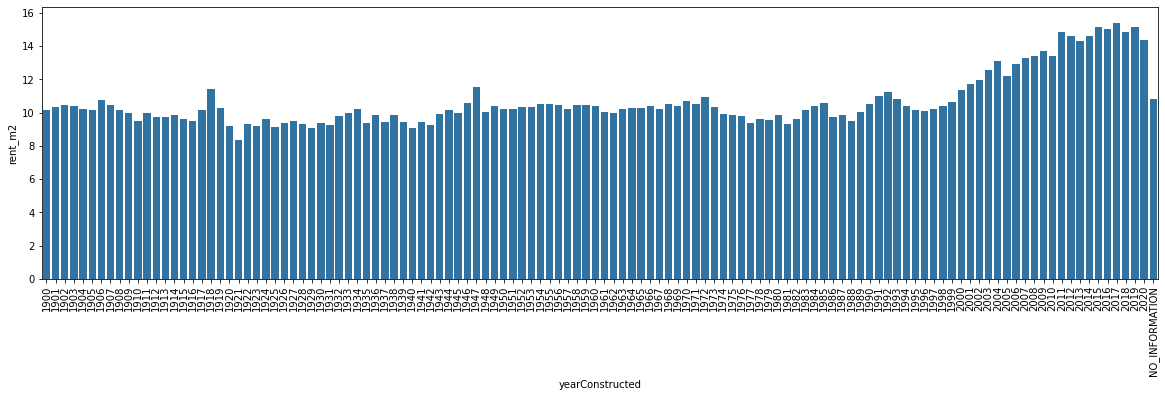

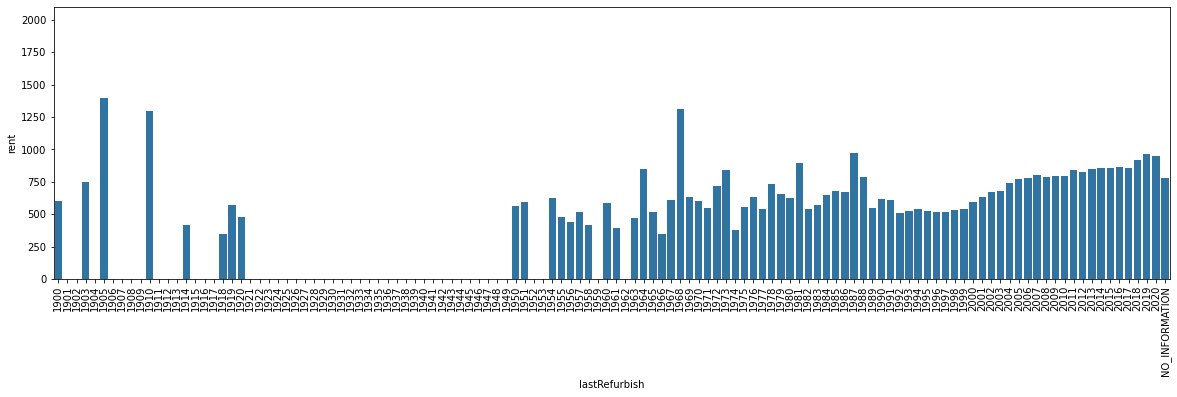

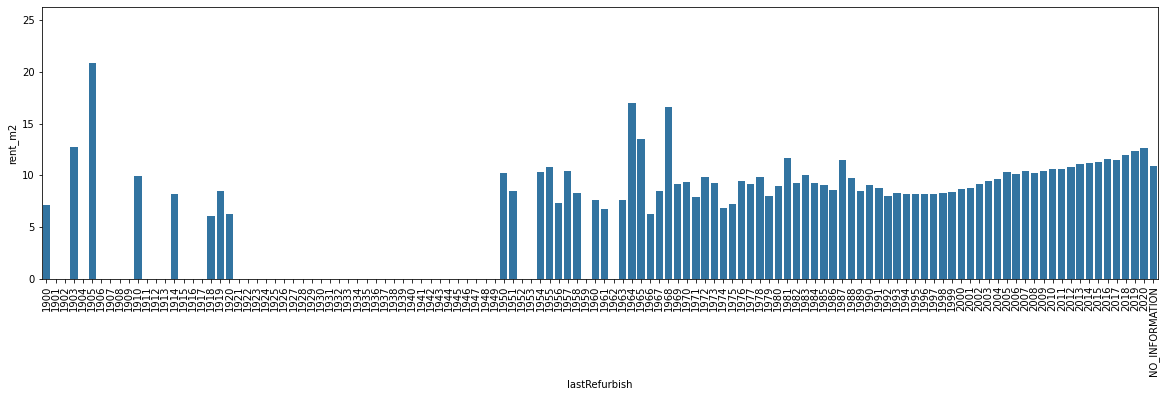

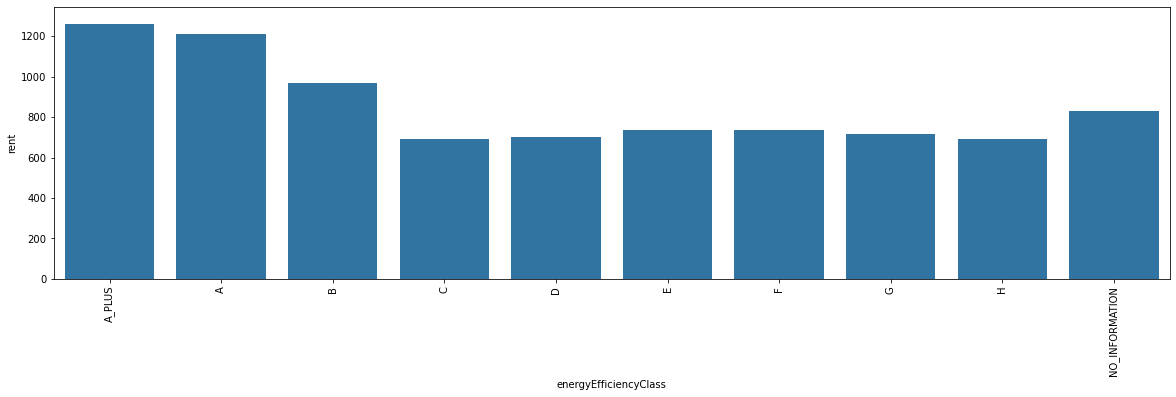

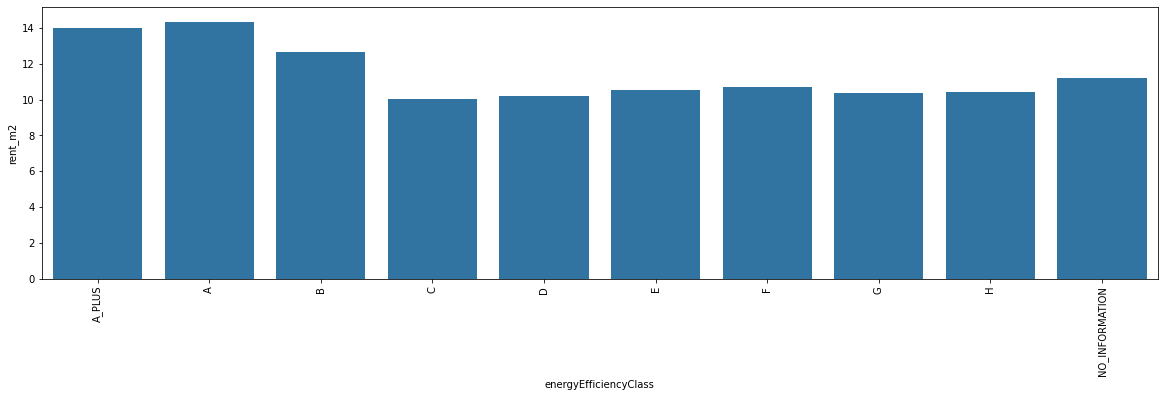

In [111]:
# create a barplot for each categorical value

list_cat_vars = ['yearConstructed', 'lastRefurbish', 'energyEfficiencyClass']
list_response_vars = ['rent', 'rent_m2']


for var in list_cat_vars:
    for rvar in list_response_vars:
        plt.figure(figsize=[20,5])
        sns.barplot(data=df, x=var, y=rvar, errwidth=0, color=base_color)
        plt.xticks(rotation=90)

As expected there is a lot of variation in the response variable for flats constructed in the last 20 years. Before that it seems that the year does not really have an impact in the response variable (keeping all other variables constant).

On the other hand the variable last refurbish does not make much sense, as there are some peaks for refurbish made 60 years ago. In contrast it can be expected, that the rent price increases as the time since the last refurbishment decreases.

The variation in the energy class is very interesting as it seems that people are willing to pay a premium for the highest energy classes, but are indifferent to the class in the the lower classes-segment. The better the energy class the higher the rent price (keeping all other variables constant)

Lets take a look to all other variables

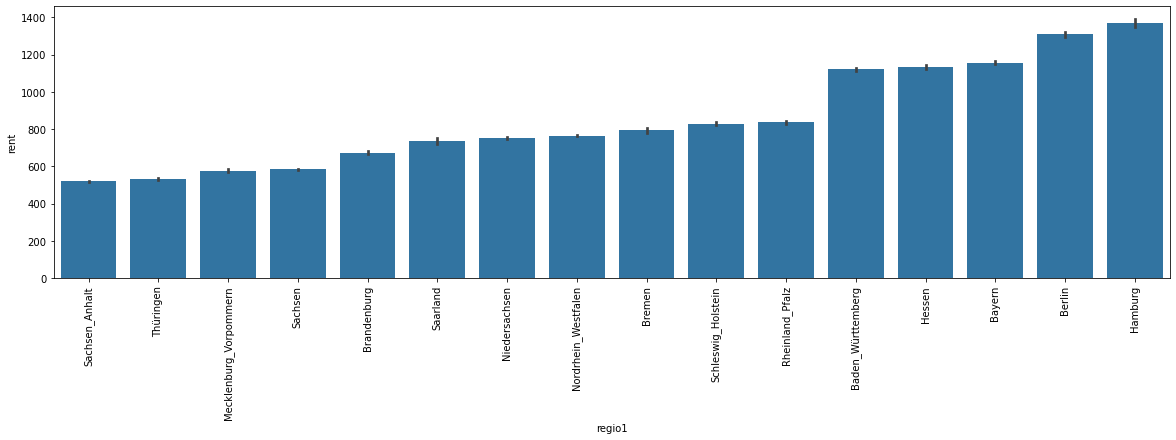

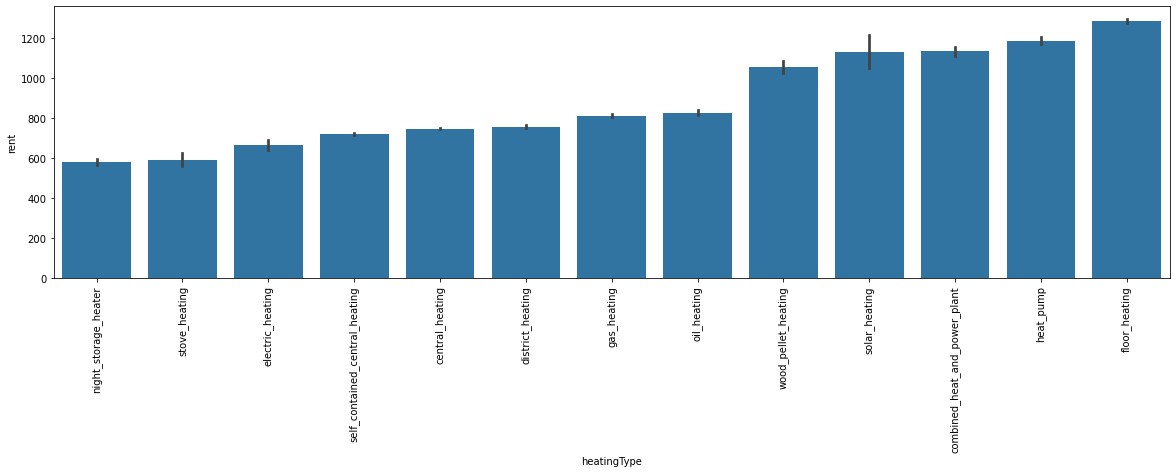

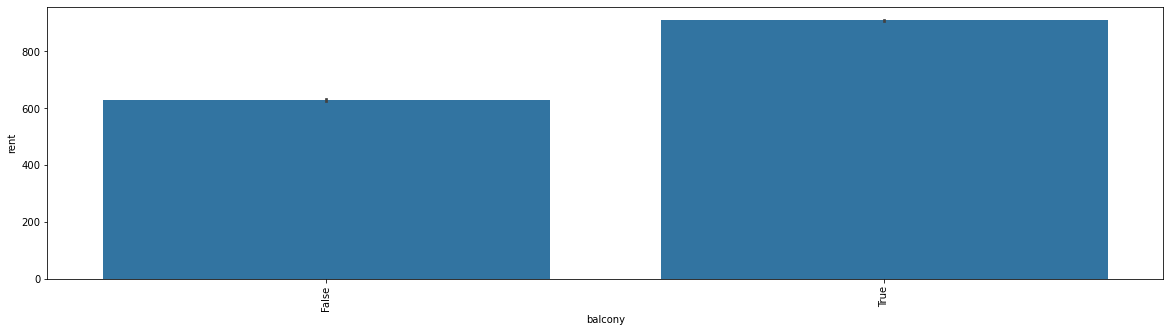

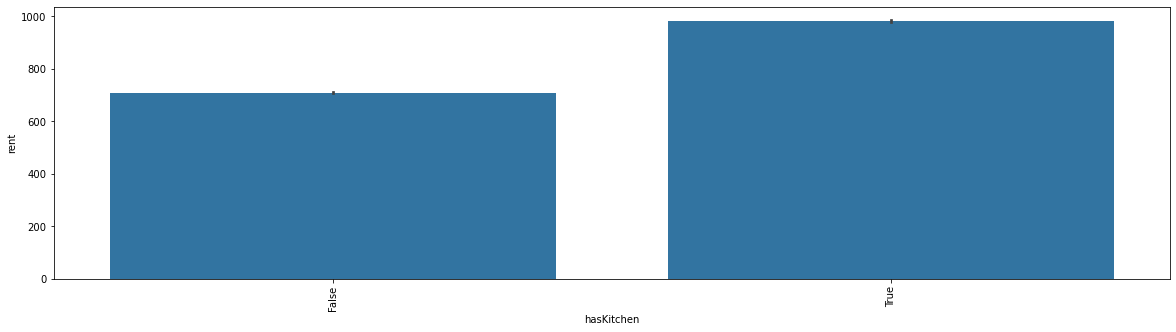

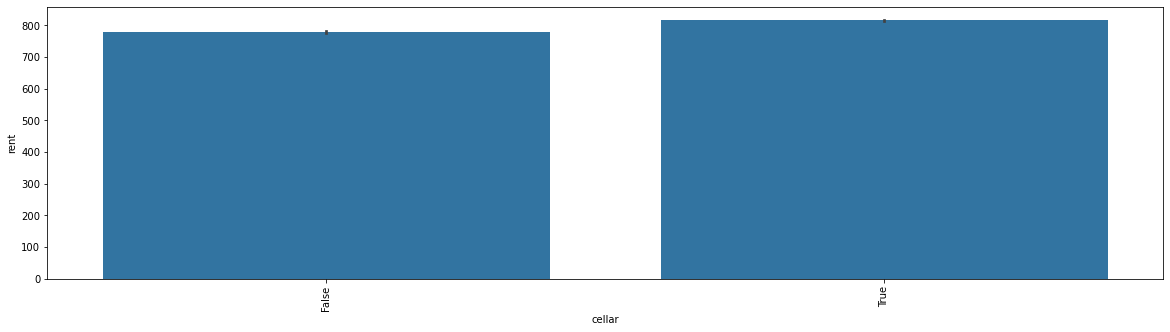

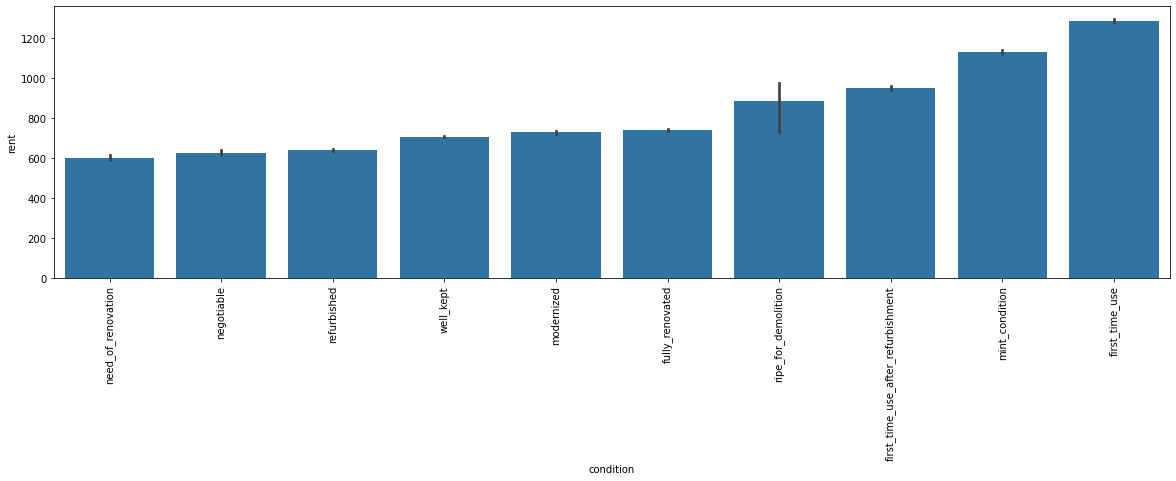

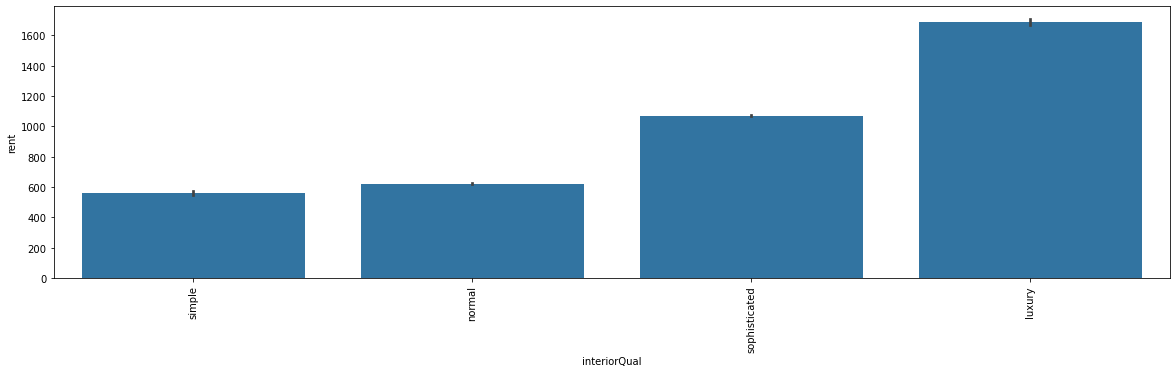

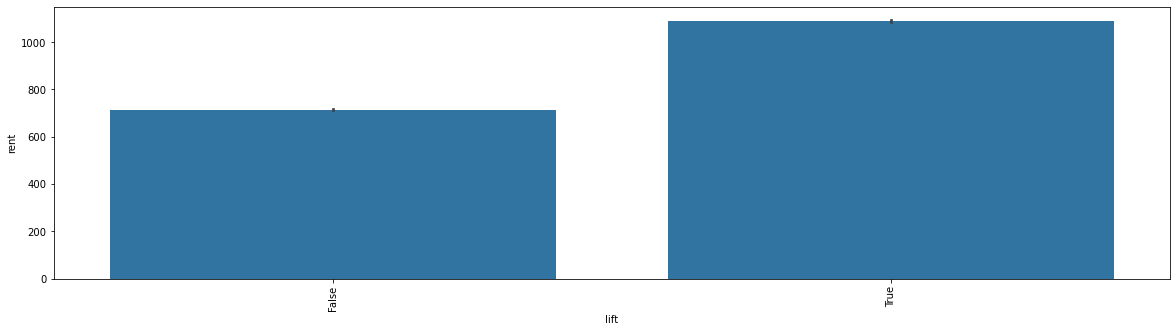

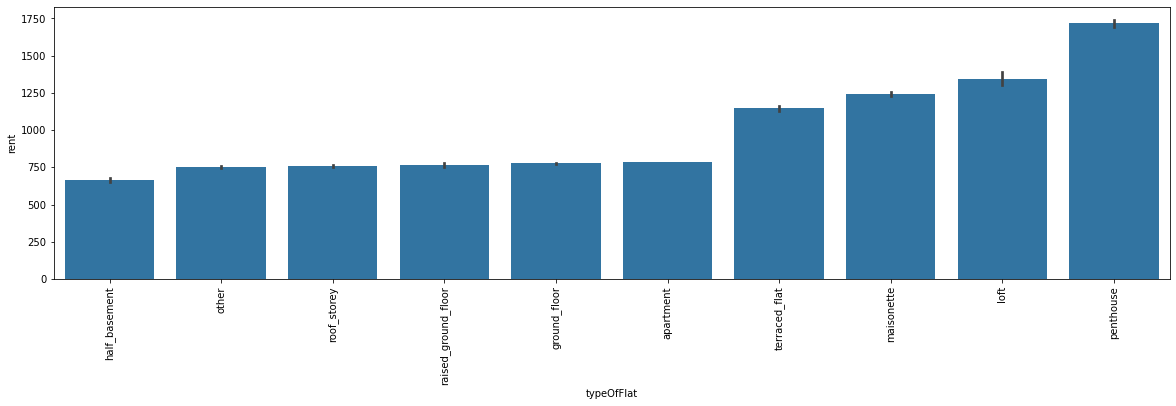

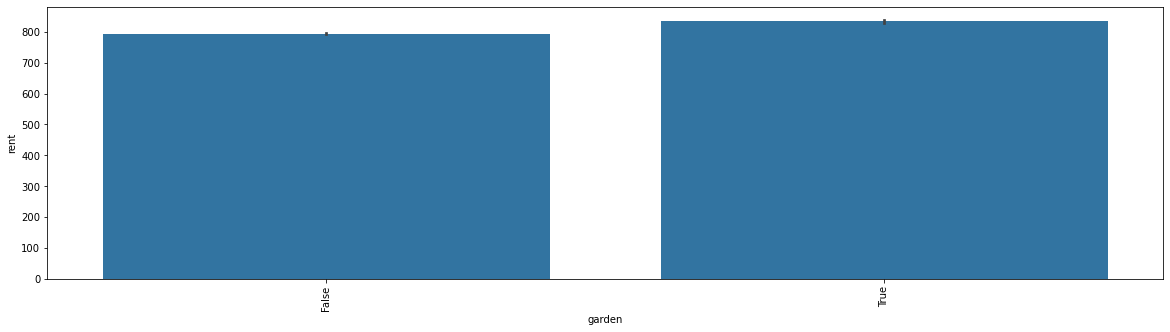

In [114]:
vars_of_interest = ['regio1', 'heatingType', 'balcony', 
                    'hasKitchen', 'cellar', 
                    'condition', 'interiorQual', 'lift', 'typeOfFlat', 
                    'garden']

for var in vars_of_interest:
    result = list(df.groupby([var]).rent.mean().sort_values().index)
    plt.figure(figsize=[20,5])
    sns.barplot(data=df, x=var, y='rent', color=base_color, order=result)
    plt.xticks(rotation=90);

There is a lot of variation in these variables.

# Assessment of NRW and Düsseldorf

In [117]:
# create a df with only the information for NRW
df_nrw = df[df.regio1 == 'Nordrhein_Westfalen'].copy()

In [118]:
df_nrw.shape

(62315, 27)

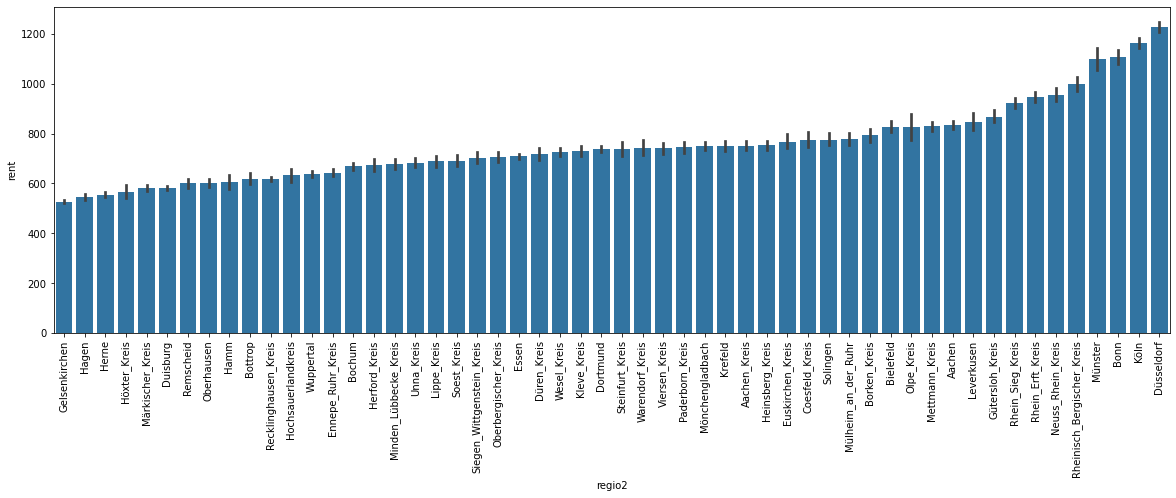

In [125]:
# get a view of the rent prices pro region in nrw
plt.figure(figsize=[20,6])
city_order = list(df_nrw.groupby(['regio2']).rent.mean().sort_values().index)
sns.barplot(data=df_nrw, x='regio2', y='rent', color=base_color, order=city_order)
plt.xticks(rotation=90);

Düsseldorf has the highest rents in Nordrhein Westfalen. Take a closer look to düsseldorf

In [127]:
# create a sub datafram for Düsseldorf

df_dus = df[df.regio2 == 'Düsseldorf'].copy()
df_dus.shape

(3624, 27)

In [128]:
df_dus.columns

Index(['Unnamed: 0', 'regio1', 'heatingType', 'newlyConst', 'balcony',
       'yearConstructed', 'noParkSpaces', 'hasKitchen', 'cellar',
       'livingSpace', 'condition', 'interiorQual', 'petsAllowed', 'lift',
       'typeOfFlat', 'geo_plz', 'noRooms', 'floor', 'numberOfFloors', 'garden',
       'regio2', 'regio3', 'energyEfficiencyClass', 'lastRefurbish', 'date',
       'rent', 'rent_m2'],
      dtype='object')

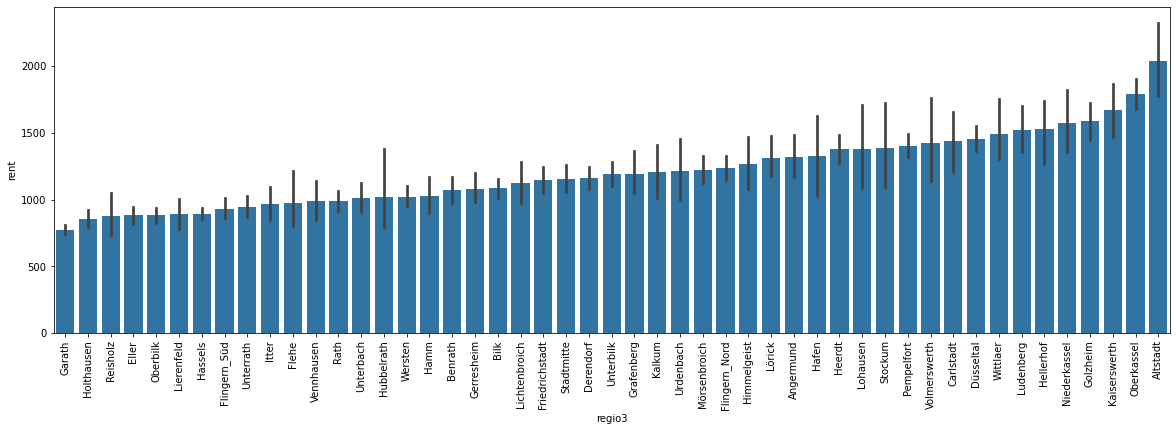

In [130]:
plt.figure(figsize=[20,6])
block_order = list(df_dus.groupby(['regio3']).rent.mean().sort_values().index)
sns.barplot(data=df_dus, x='regio3', y='rent', color=base_color, order=block_order)
plt.xticks(rotation=90);

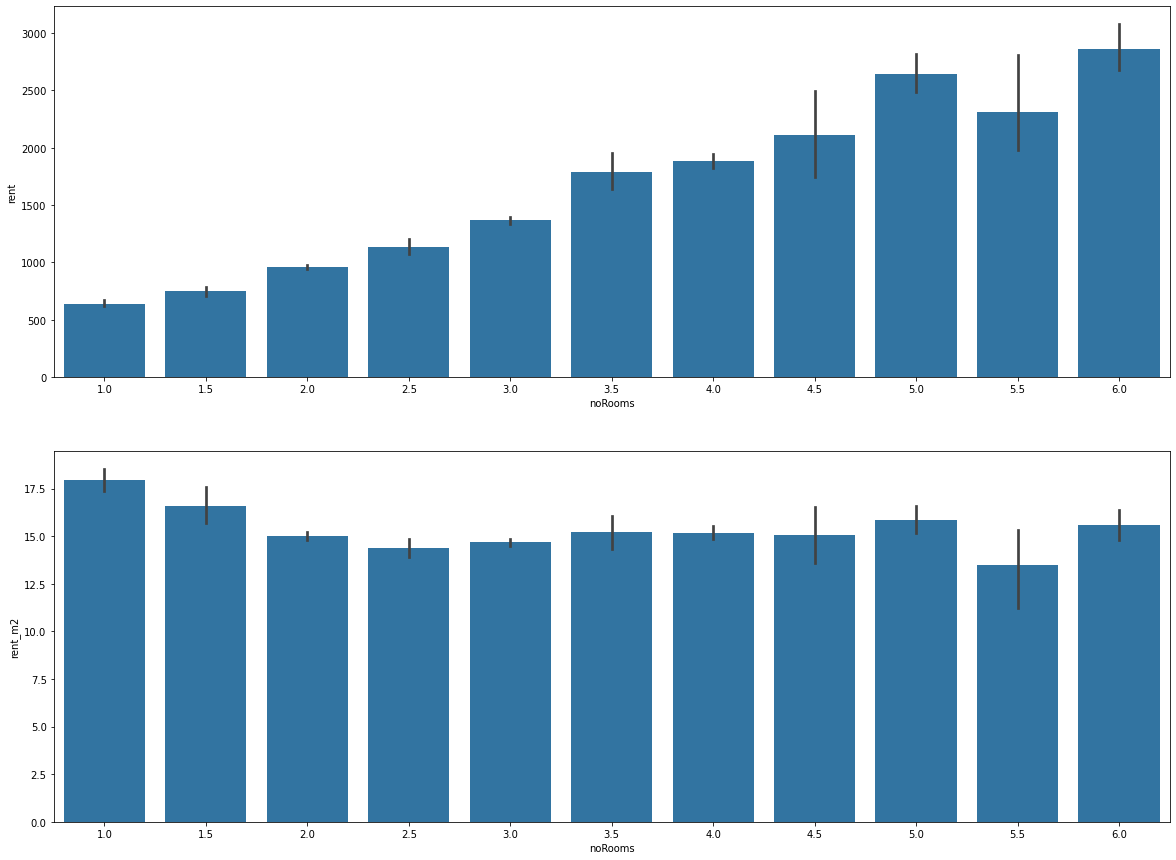

In [132]:
# impact of the number of rooms in the rent price

plt.figure(figsize=[20,15])

plt.subplot(2,1,1)
rooms_r_order = list(df_dus.groupby(['noRooms']).rent.mean().sort_values().index)
sns.barplot(data=df_dus, x='noRooms', y='rent', color=base_color);

plt.subplot(2,1,2)
rooms_rqm_order = list(df_dus.groupby(['noRooms']).rent_m2.mean().sort_values().index)
sns.barplot(data=df_dus, x='noRooms', y='rent_m2', color=base_color);

When normalizin by the living space the number of rooms do not the same variation, since some appartments could be lofts or else. As we saw before the number of rooms is correlated with the leaving space.